### Data

In [26]:
import pandas as pd

train_df = pd.read_csv('../../data/genre_train_df.csv')
test_df = pd.read_csv('../../data/genre_test_df.csv')

### Preprocessing

In [27]:
track_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

train_df = train_df[track_features]
test_df = test_df[track_features]
genre_df = pd.concat([train_df, test_df])

### K-means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from tqdm import tqdm

k_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_scores, silhouette_scores = [], []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genre_df)
    clusters = kmeans.predict(test_df)

    inertia = kmeans.inertia_
    s_score = silhouette_score(test_df.values, clusters)
    
    inertia_scores.append(inertia)
    silhouette_scores.append(s_score)

  0%|          | 0/9 [00:00<?, ?it/s]

NameError: name 'k_range' is not defined

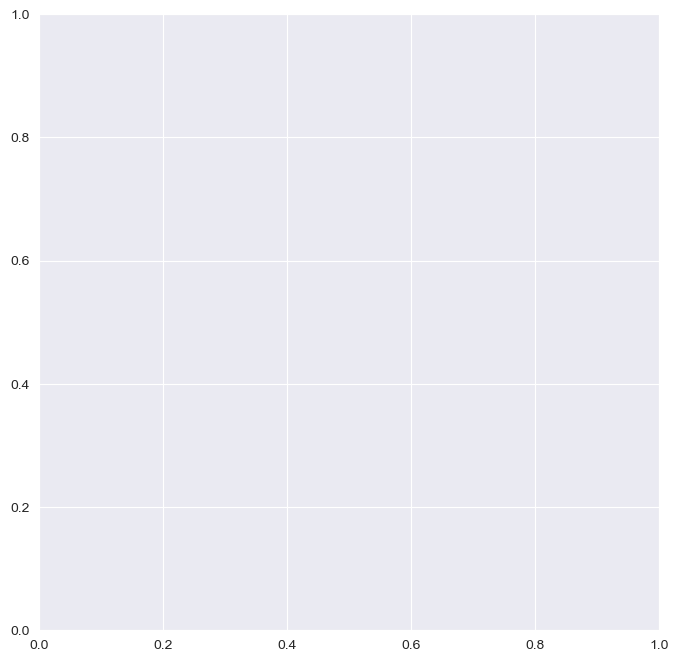

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(k_range, inertia_scores)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
ax.set_title('Inertia with Different K')

plt.tight_layout()
plt.show()

In [6]:
fig.savefig("../../figures/Inertia values with different K.pdf")

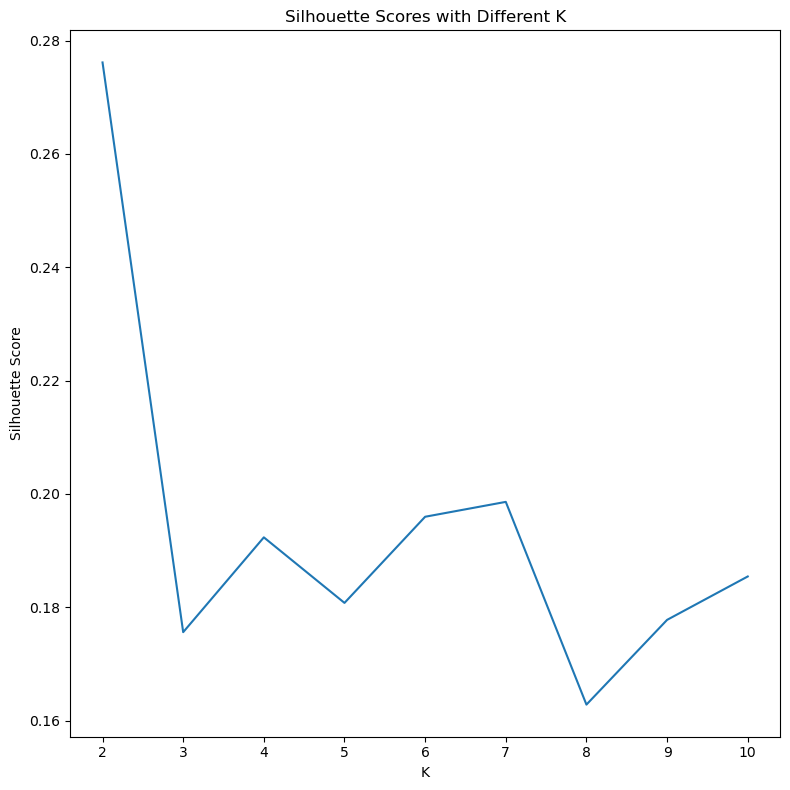

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(k_range, silhouette_scores)
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores with Different K')

plt.tight_layout()
plt.show()

In [8]:
fig.savefig("../../figures/Silhouette scores with different K.pdf")

### Best K
1. Cluster data into K (4) clusters

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
genre_df['Predicted_Genre'] = kmeans.fit_predict(genre_df)

In [1]:
genre_df['Predicted_Genre'].value_counts()

NameError: name 'genre_df' is not defined

2. Inverse transform cluster centroid values into original, unscaled values

In [12]:
from pickle import load

genre_scaler = load(open('../genre_scaler.pkl', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: '../genre_scaler.pkl'

In [13]:
kmeans.cluster_centers_

array([[ 0.42099095,  0.59908874,  0.51267274, -0.28854444, -0.26834761,
        -0.09137649,  0.84319448],
       [ 0.45357935, -0.16836367, -0.23504548,  1.92848866, -0.11899307,
        -0.09243653, -0.10794065],
       [-0.99146148, -1.38847921, -0.97463897, -0.47405564,  1.71577286,
         0.52784654, -0.69979916],
       [-0.3271924 , -0.04710036, -0.09412052, -0.41420131, -0.38841427,
        -0.07335276, -0.72100637]])

In [14]:
genre_df.columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Valence', 'Predicted_Genre'],
      dtype='object')

In [15]:
for i, c in enumerate(kmeans.cluster_centers_):
    print(f"Genre {i}: {genre_scaler.inverse_transform(c.reshape(1, -1))}")

NameError: name 'genre_scaler' is not defined

3. Visualise clustered data

In [16]:
vis_df = genre_df.copy().reset_index()
umap_df = vis_df.drop(['Predicted_Genre', 'index'], axis=1).drop_duplicates()

In [17]:
import matplotlib.pyplot as plt
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(umap_df)

ModuleNotFoundError: No module named 'umap'

NameError: name 'embedding' is not defined

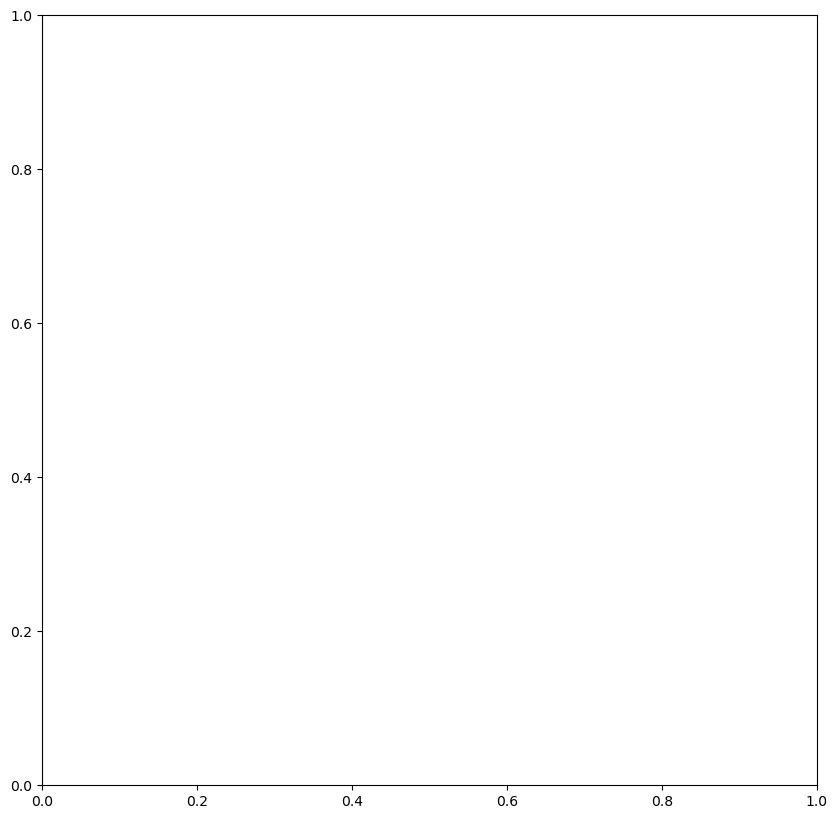

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=vis_df['Predicted_Genre'][umap_df.index].values)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot of Genre Clusters with UMAP 2D Projection', y=1.01)

handles, _ = scatter.legend_elements()
plt.legend(handles, [f"Genre {i}" for i in range(kmeans.n_clusters)], title="Clusters")

plt.tight_layout()
plt.show()

In [19]:
fig.savefig('../../figures/2D UMAP visualisation of genre clusters.pdf')

### Clustered Genre Dataset

In [20]:
train_df = pd.read_csv('../../data/genre_train_df.csv')
test_df = pd.read_csv('../../data/genre_test_df.csv')

In [21]:
train_df['Predicted_Genre'] = genre_df['Predicted_Genre'][:len(train_df)].values
test_df['Predicted_Genre'] = genre_df['Predicted_Genre'][len(train_df):].values

In [22]:
clustered_df = pd.concat([train_df, test_df])
clustered_df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Previous_Date,Artist_Year_Score,Points_Category,Predicted_Genre
0,128,Romantic - NOTD Remix,Stanaj,2017-01-24,0.417042,-0.040277,-0.858544,1.256145,-0.083190,-0.150801,...,Albania,Europe,73,73.0,3SGWp9fJCzgK0WcpcKSQdy,https://open.spotify.com/track/3SGWp9fJCzgK0WcpcKSQdy,2017-01-23,512.0,2,1
1,156,Bubalu,"Becky G, Prince Royce, DJ Luian, Mambo Kingz, Anuel AA",2019-03-31,0.808061,-1.758788,1.915108,-0.183260,1.557062,-0.150801,...,United States,Anglo-America,45,9.0,7dNwJbsT0sg1le5kVugGJb,https://open.spotify.com/track/7dNwJbsT0sg1le5kVugGJb,2019-03-30,26814.6,2,3
2,108,Redemption (with Babes Wodumo),Zacari,2018-02-09,0.677722,0.775394,-0.570984,-0.132218,-0.408768,0.172549,...,United States,Anglo-America,93,93.0,4YMHk2VRIQpRv4aFtRzH12,https://open.spotify.com/track/4YMHk2VRIQpRv4aFtRzH12,2018-02-08,0.0,3,0
3,32,WAP (feat. Megan Thee Stallion),Cardi B,2021-02-05,1.785610,-1.142366,-0.698556,2.726176,-0.903316,-0.150801,...,United States,Anglo-America,169,169.0,4Oun2ylbjFKMPTiaSbbCih,https://open.spotify.com/track/4Oun2ylbjFKMPTiaSbbCih,2021-02-04,33852.0,5,1
4,15,bad guy,Billie Eilish,2019-11-21,0.091193,-1.322934,-1.903169,2.726176,0.370146,2.061594,...,United States,Anglo-America,186,186.0,2Fxmhks0bxGSBdJ92vM42m,https://open.spotify.com/track/2Fxmhks0bxGSBdJ92vM42m,2019-11-20,331366.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94083,175,Godzilla (feat. Juice WRLD),"Eminem, Juice WRLD",2021-04-20,0.865990,0.669543,1.916924,2.389294,-0.384040,-0.150801,...,United States,Anglo-America,26,26.0,7FIWs0pqAYbP91WWM0vlTQ,https://open.spotify.com/track/7FIWs0pqAYbP91WWM0vlTQ,2021-04-19,26717.0,1,1
94084,4,HUMBLE.,Kendrick Lamar,2017-05-09,1.590100,-0.102542,-0.394963,-0.060758,-0.981620,-0.150801,...,United States,Anglo-America,197,197.0,7KXjTSCq5nL1LoYtL7XAwS,https://open.spotify.com/track/7KXjTSCq5nL1LoYtL7XAwS,2017-05-08,65624.0,5,3
94085,79,Feliz navidad,José Feliciano,2018-12-19,-1.472885,1.366910,-0.541706,-0.652854,1.219120,-0.150801,...,Puerto Rico,Latin-America,122,122.0,7taXf5odg9xCAZERYfyOkS,https://open.spotify.com/track/7taXf5odg9xCAZERYfyOkS,2018-12-18,2915.0,4,0
94086,118,SAD!,XXXTENTACION,2020-07-08,0.373595,-0.152354,1.917056,0.378210,0.081659,-0.082728,...,United States,Anglo-America,83,83.0,3ee8Jmje8o58CHK66QrVC2,https://open.spotify.com/track/3ee8Jmje8o58CHK66QrVC2,2020-07-07,53571.0,3,0


In [23]:
clustered_df.to_csv('../../data/clustered_df.csv', index=False)

In [24]:
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=track_features)
centroids_df

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
0,0.420991,0.599089,0.512673,-0.288544,-0.268348,-0.091376,0.843194
1,0.453579,-0.168364,-0.235045,1.928489,-0.118993,-0.092437,-0.107941
2,-0.991461,-1.388479,-0.974639,-0.474056,1.715773,0.527847,-0.699799
3,-0.327192,-0.047100,-0.094121,-0.414201,-0.388414,-0.073353,-0.721006


In [25]:
centroids_df.to_csv('../../data/centroids_df.csv', index=False)